# Heatmaps for 2016-2017 NBA Shooting Data

## Import Neccesary Modules

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request

import matplotlib.pyplot as plt
from matplotlib import patches, gridspec
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import  OffsetImage

import scipy
from scipy import stats
from scipy.stats import gaussian_kde

## Import NBA shot log data snd display all columns

In [30]:
shot = pd.read_csv("NBA Shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


In [31]:
shot

self_previous_shot player_position home_game  location_x  \
0                     NaN              SF       Yes        97.0   
1                  MISSED               C       Yes        52.0   
2                  SCORED              SG       Yes       239.0   
3                  SCORED              PG       Yes       102.0   
4                  SCORED              PF       Yes       128.0   
...                   ...             ...       ...         ...   
210067             SCORED               F        No        58.0   
210068             SCORED               F        No        52.0   
210069             SCORED               F        No       171.0   
210070             MISSED              PF        No       285.0   
210071             MISSED              PG        No       195.0   

       opponent_previous_shot home_team             shot_type  points  \
0                      SCORED       ATL      Pullup Jump Shot       2   
1                      SCORED       ATL         Tip Dunk Shot       2   
2                      MISSED       ATL             Jump Shot       2   
3                      SCORED       ATL      Pullup Jump Shot       2   
4                      MISSED       ATL  Turnaround Jump Shot       2   
...                       ...       ...                   ...     ...   
210067                 MISSED       MIA             Jump Shot       2   
210068                 SCORED       MIA                  Dunk       2   
210069                 SCORED       MIA             Jump Shot       2   
210070                 SCORED       MIA             Jump Shot       3   
210071                 MISSED       MIA             Jump Shot       3   

       away_team  location_y   time        date      shoot_player  \
0            WAS       405.0   1:09  10/27/2016     Kent Bazemore   
1            WAS       250.0   1:11  10/27/2016     Dwight Howard   
2            WAS       223.0   1:41  10/27/2016       Kyle Korver   
3            WAS       385.0   2:16  10/27/2016   Dennis Schroder   
4            WAS       265.0   2:40  10/27/2016      Paul Millsap   
...          ...         ...    ...         ...               ...   
210067       WAS       153.0   8:18   4/12/2017     Daniel Ochefu   
210068       WAS       250.0   8:51   4/12/2017     Daniel Ochefu   
210069       WAS       149.0   9:20   4/12/2017     Daniel Ochefu   
210070       WAS       334.0  10:33   4/12/2017  Chris McCullough   
210071       WAS       455.0  11:50   4/12/2017        Trey Burke   

        time_from_last_shot  quarter current_shot_outcome  
0                       NaN        1               MISSED  
1                       2.0        1               SCORED  
2                      30.0        1               SCORED  
3                      35.0        1               SCORED  
4                      24.0        1               MISSED  
...                     ...      ...                  ...  
210067                 39.0        4               SCORED  
210068                 33.0        4               SCORED  
210069                 29.0        4               MISSED  
210070                 73.0        4               MISSED  
210071                 77.0        4               SCORED  

[210072 rows x 16 columns]

## Descriptive Statistics for shot log data

In [32]:
shot.describe()

location_x         points    location_y  time_from_last_shot  \
count  209675.000000  210072.000000  209675.00000        200072.000000   
mean      468.524507       2.316130     249.44723            33.279489   
std       345.063654       0.464965     111.02320            19.797357   
min         0.000000       2.000000       0.00000             0.000000   
25%        94.000000       2.000000     197.00000            22.000000   
50%       342.000000       2.000000     250.00000            31.000000   
75%       843.000000       3.000000     303.00000            41.000000   
max       933.000000       3.000000     500.00000           255.000000   

             quarter  
count  210072.000000  
mean        2.480383  
std         1.136841  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         3.000000  
max         8.000000

## Plot all the shots taken throughout the season

Text(0.5, 1.0, 'All shots for 16-17 NBA season')

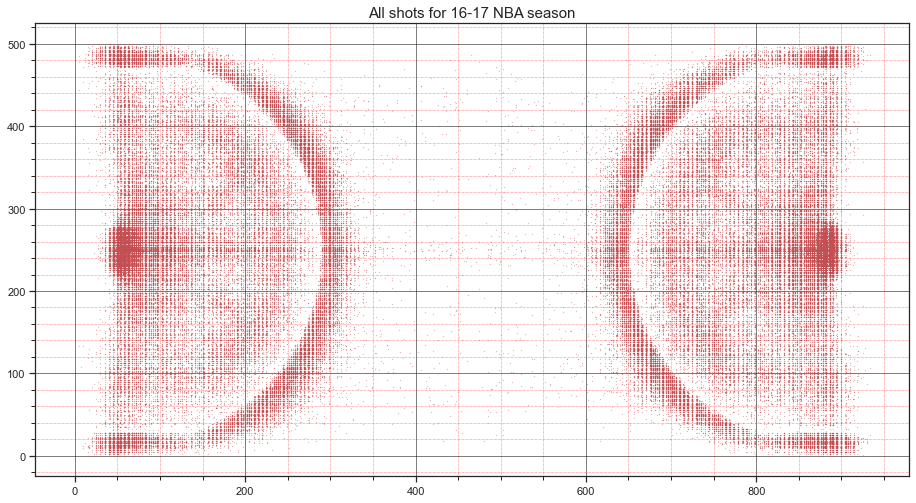

In [33]:
x = shot['location_x']
y = shot['location_y']

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("All shots for 16-17 NBA season", fontsize = 15)

## Plot all the shots to one half of the court

In [34]:
shot['halfcourt_y'] =np.where(shot['location_x'] > 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_x'] =np.where(shot['location_x'] > 933/2, 500 - shot['location_y'],shot['location_y'])
shot['halfcourt_x'] = shot['halfcourt_x'] 
shot.describe()

location_x         points    location_y  time_from_last_shot  \
count  209675.000000  210072.000000  209675.00000        200072.000000   
mean      468.524507       2.316130     249.44723            33.279489   
std       345.063654       0.464965     111.02320            19.797357   
min         0.000000       2.000000       0.00000             0.000000   
25%        94.000000       2.000000     197.00000            22.000000   
50%       342.000000       2.000000     250.00000            31.000000   
75%       843.000000       3.000000     303.00000            41.000000   
max       933.000000       3.000000     500.00000           255.000000   

             quarter    halfcourt_y    halfcourt_x  
count  210072.000000  209675.000000  209675.000000  
mean        2.480383     133.268520     249.696053  
std         1.136841      89.606222     111.024160  
min         1.000000       0.000000       0.000000  
25%         1.000000      55.000000     197.000000  
50%         2.000000      92.000000     250.000000  
75%         3.000000     213.000000     303.000000  
max         8.000000     465.000000     500.000000

Text(0.5, 1.0, 'All shots for 16-17 NBA season')

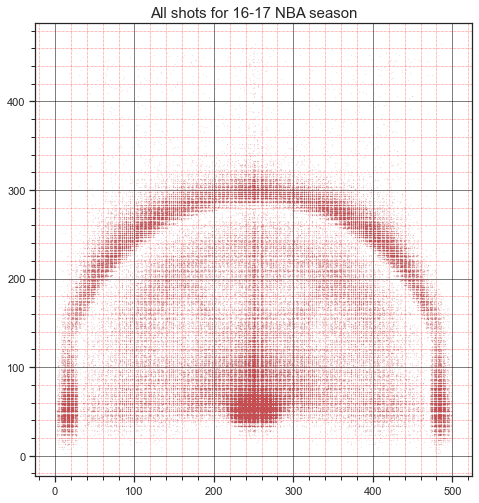

In [35]:
plt.figure(figsize=(94/12,50/6))
plt.scatter(shot['halfcourt_x'],shot['halfcourt_y'], s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("All shots for 16-17 NBA season", fontsize = 15)

## Define a function to draw the court lines

In [36]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):

    if ax is None:
        ax = plt.gca()

    hoop = Circle((250,47.5), radius=7.5, linewidth=lw, color=color, fill=False)

    backboard = Rectangle((220, 40), 60, -1, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((170, 0), 160, 190, linewidth=lw, color=color,fill=False)
    inner_box = Rectangle((190, 0), 120, 190, linewidth=lw, color=color,fill=False)

    top_free_throw = Arc((250, 190), 120, 120, theta1=0, theta2=180,linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((250, 190), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((250, 47.5), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    corner_three_a = Rectangle((30, 0), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((470, 0), 0, 140, linewidth=lw, color=color)

    three_arc = Arc((250, 47.5), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)


    center_outer_arc = Arc((250, 470), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((250, 470), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((0, 0), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

## Plotting our shot log data

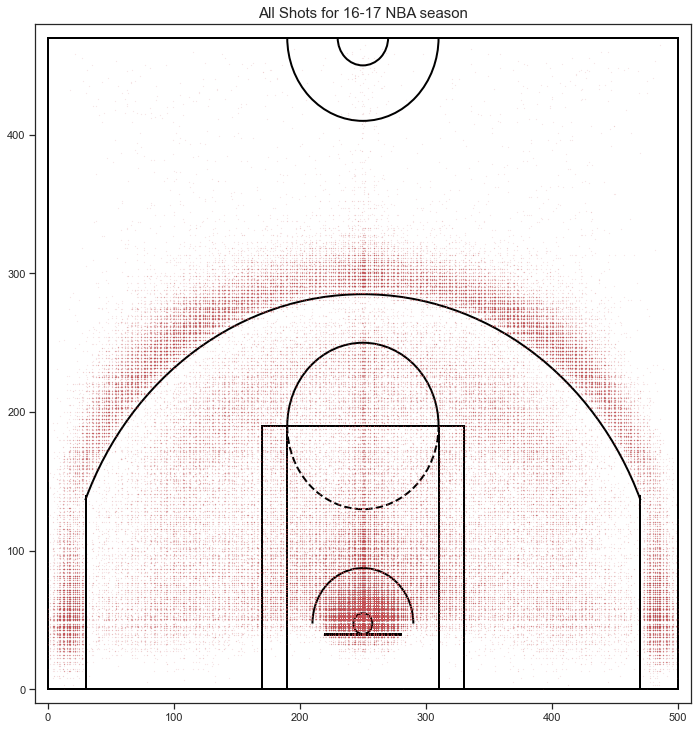

In [37]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)
plt.scatter(shot['halfcourt_x'],shot['halfcourt_y'], s=.01,c='r', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("All Shots for 16-17 NBA season", fontsize = 15)
plt.show()

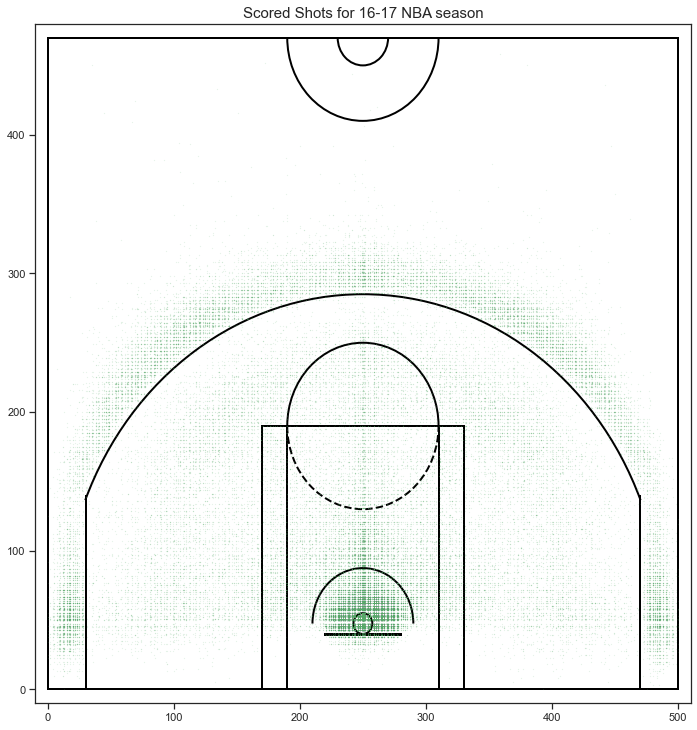

In [38]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Scored = shot[shot.current_shot_outcome == 'SCORED']
plt.scatter(Scored['halfcourt_x'],Scored['halfcourt_y'], s=.01,c='g', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Scored Shots for 16-17 NBA season", fontsize = 15)
plt.show()

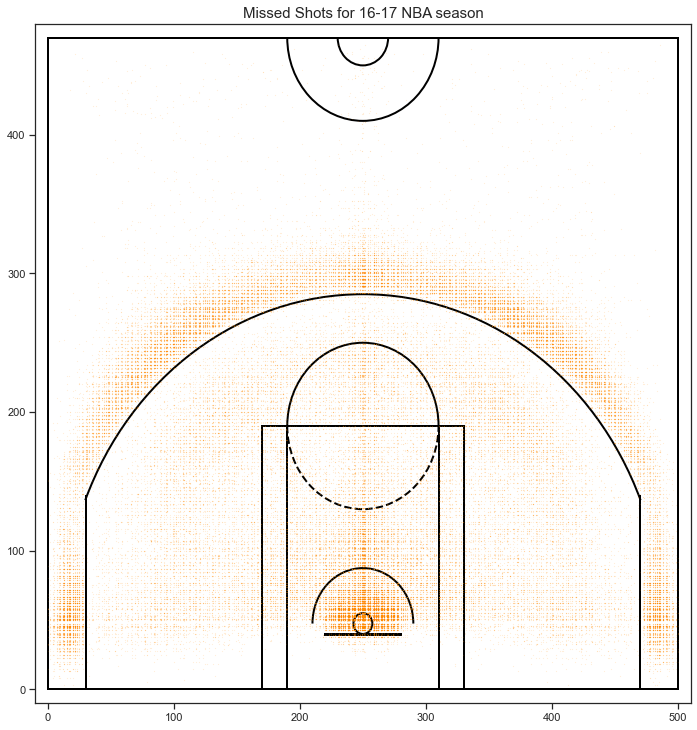

In [39]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Missed = shot[shot.current_shot_outcome == 'MISSED']
plt.scatter(Missed['halfcourt_x'],Missed['halfcourt_y'], s=.01,c='darkorange', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Missed Shots for 16-17 NBA season", fontsize = 15)
plt.show()


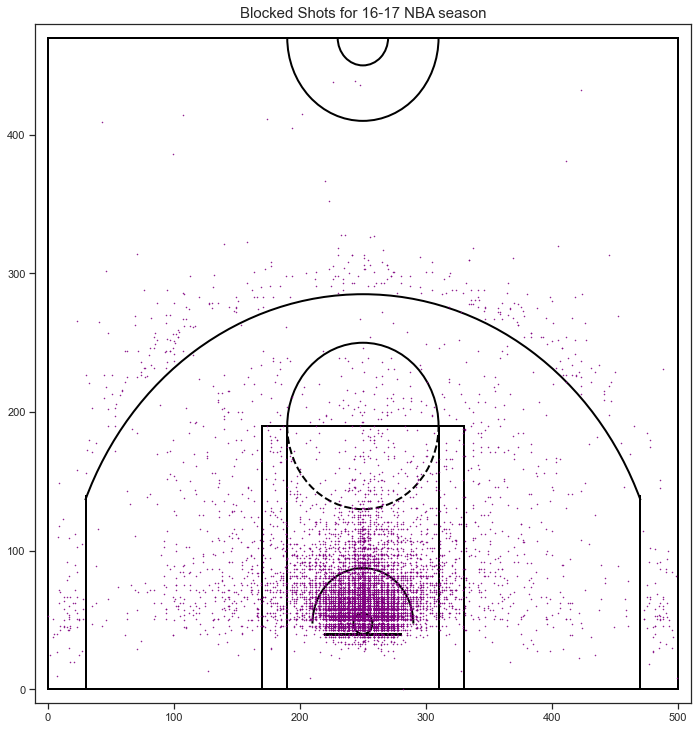

In [40]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']
plt.scatter(Blocked['halfcourt_x'], Blocked['halfcourt_y'], s=1, c='purple', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Blocked Shots for 16-17 NBA season", fontsize = 15)
plt.show()

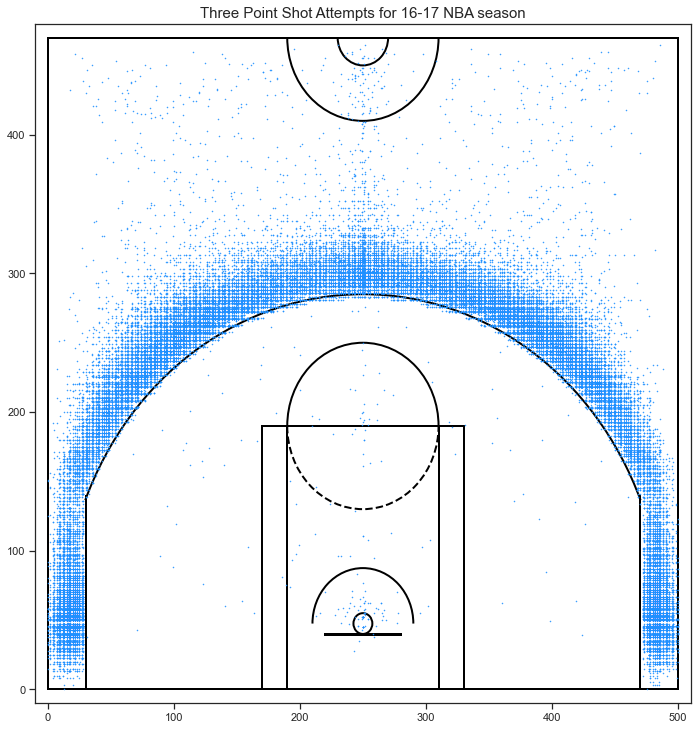

In [41]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Threes = shot[shot['points']==3]
plt.scatter(Threes['halfcourt_x'], Threes['halfcourt_y'], s=1, c='dodgerblue', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Three Point Shot Attempts for 16-17 NBA season", fontsize = 15)
plt.show()

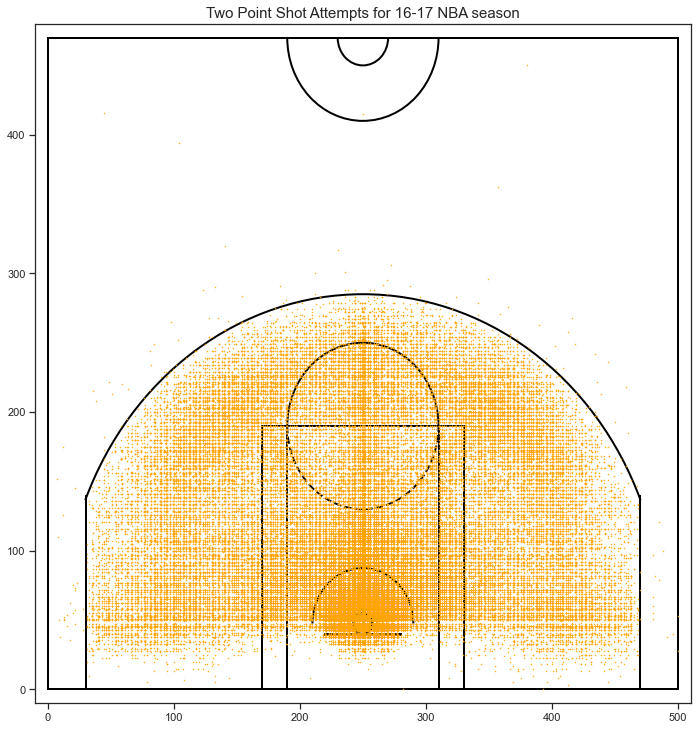

In [42]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Twos = shot[shot['points']==2]
plt.scatter(Twos['halfcourt_x'], Twos['halfcourt_y'], s=1, c='orange', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Two Point Shot Attempts for 16-17 NBA season", fontsize = 15)
plt.show()

## Comparing Players

In [43]:
playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'freq', ascending = True)

shoot_player count unique     top  freq
202      Jarnell Stokes     1      1  SCORED     1
377           RJ Hunter     1      1  MISSED     1
32        Arinze Onuaku     4      2  SCORED     2
335          Mike Tobey     4      3  MISSED     2
203        Jarrett Jack     3      2  SCORED     2
..                  ...   ...    ...     ...   ...
25       Andrew Wiggins  1568      3  MISSED   760
28        Anthony Davis  1525      3  SCORED   770
193        James Harden  1532      3  MISSED   772
257  Karl-Anthony Towns  1479      3  SCORED   802
402   Russell Westbrook  1940      3  MISSED  1026

[485 rows x 5 columns]

In [44]:
Kyrie = shot[shot['shoot_player']=='Kyrie Irving']
Kyrie.head(5)

self_previous_shot player_position home_game  location_x  \
35024             SCORED              PG       Yes       274.0   
35031             MISSED              PG       Yes        54.0   
35036             SCORED              PG       Yes       200.0   
35038             SCORED              PG       Yes        64.0   
35040             MISSED              PG       Yes        54.0   

      opponent_previous_shot home_team      shot_type  points away_team  \
35024                 SCORED       CLE      Jump Shot       3       NYK   
35031                 MISSED       CLE          Layup       2       NYK   
35036                 MISSED       CLE      Jump Shot       2       NYK   
35038                 SCORED       CLE  Driving Layup       2       NYK   
35040                 MISSED       CLE          Layup       2       NYK   

       location_y  time        date  shoot_player  time_from_last_shot  \
35024       357.0  1:14  10/25/2016  Kyrie Irving                 13.0   
35031       250.0  3:59  10/25/2016  Kyrie Irving                 15.0   
35036       218.0  5:47  10/25/2016  Kyrie Irving                 35.0   
35038       262.0  6:35  10/25/2016  Kyrie Irving                 31.0   
35040       262.0  7:00  10/25/2016  Kyrie Irving                 16.0   

       quarter current_shot_outcome  halfcourt_y  halfcourt_x  
35024        1               MISSED        274.0        357.0  
35031        1               MISSED         54.0        250.0  
35036        1               SCORED        200.0        218.0  
35038        1              BLOCKED         64.0        262.0  
35040        1               MISSED         54.0        262.0

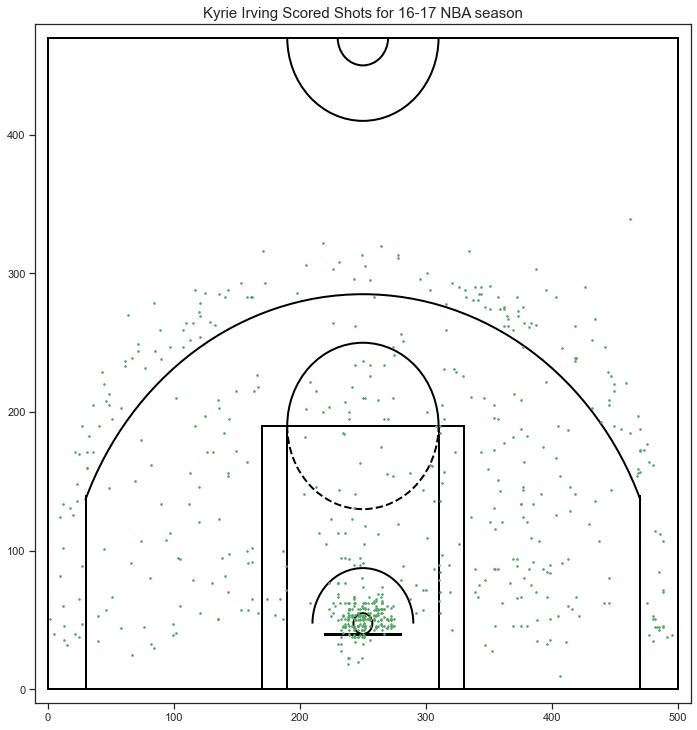

In [45]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

KyrieScored = Kyrie[Kyrie.current_shot_outcome =='SCORED']

plt.scatter(KyrieScored['halfcourt_x'],KyrieScored['halfcourt_y'], s=10,c='g', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Kyrie Irving Scored Shots for 16-17 NBA season", fontsize = 15)
plt.show()

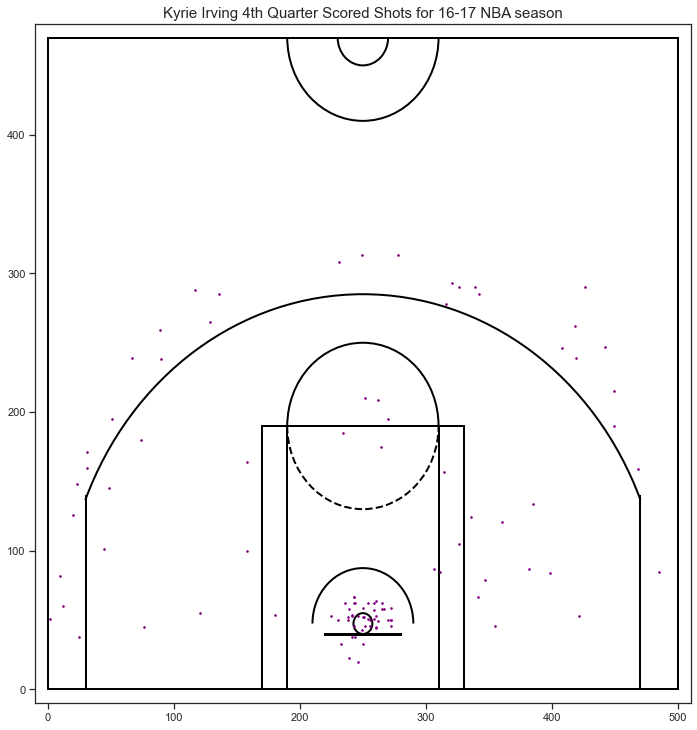

In [69]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

KyrieScoredQ4 = KyrieScored[KyrieScored['quarter']==4]

plt.scatter(KyrieScoredQ4['halfcourt_x'],KyrieScoredQ4['halfcourt_y'], s=10,c='purple', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Kyrie Irving 4th Quarter Scored Shots for 16-17 NBA season", fontsize = 15)
plt.show()

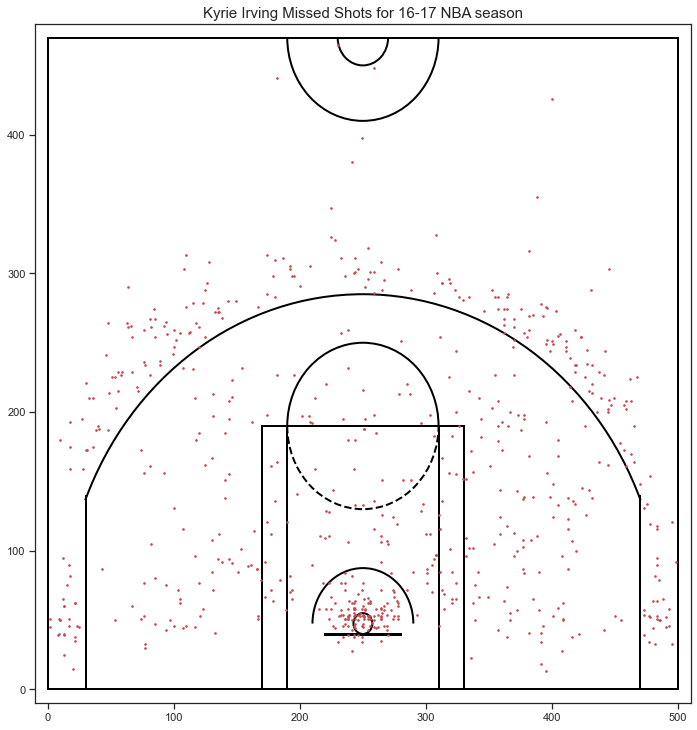

In [46]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

KyrieMissed = Kyrie[Kyrie.current_shot_outcome =='MISSED']

plt.scatter(KyrieMissed['halfcourt_x'],KyrieMissed['halfcourt_y'], s=10,c='r', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Kyrie Irving Missed Shots for 16-17 NBA season", fontsize = 15)
plt.show()

Text(0.5, 1.0, 'All Kyrie Irving Shots for 16-17')

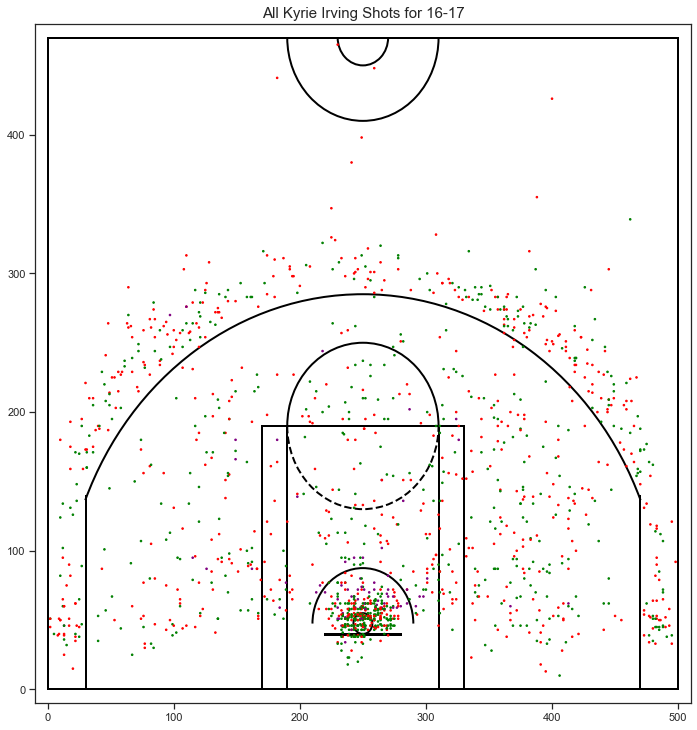

In [47]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)
plt.xlim(-10,510)
plt.ylim(-10,480)

hxK = Kyrie['halfcourt_x']
hyK = Kyrie['halfcourt_y']
colors = np.where(Kyrie['current_shot_outcome']=='SCORED','green',
                  np.where(Kyrie['current_shot_outcome']=='MISSED','red','purple'))
plt.scatter(hxK,hyK, s=10, c= colors, marker= '.')
plt.title("All Kyrie Irving Shots for 16-17", fontsize = 15)

## Kyrie Irving vs Steph Curry

Text(0.5, 1.0, 'All Stephen Curry Shots for 16-17')

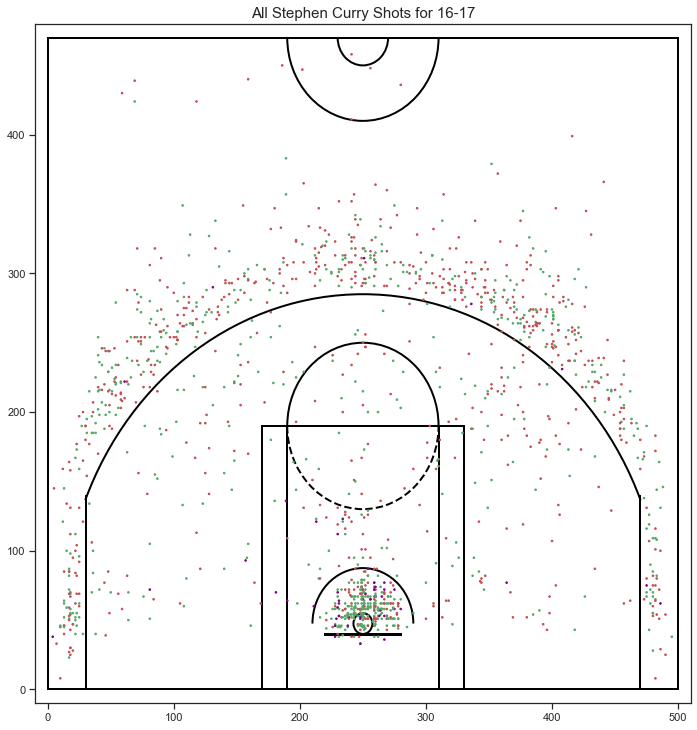

In [48]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)
plt.xlim(-10,510)
plt.ylim(-10,480)

Curry = shot[shot['shoot_player']=='Stephen Curry']
hxC = Curry['halfcourt_x']
hyC = Curry['halfcourt_y']
colors = np.where(Curry['current_shot_outcome']=='SCORED','g',np.where(Curry['current_shot_outcome']=='MISSED','r','purple'))
plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.title("All Stephen Curry Shots for 16-17", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

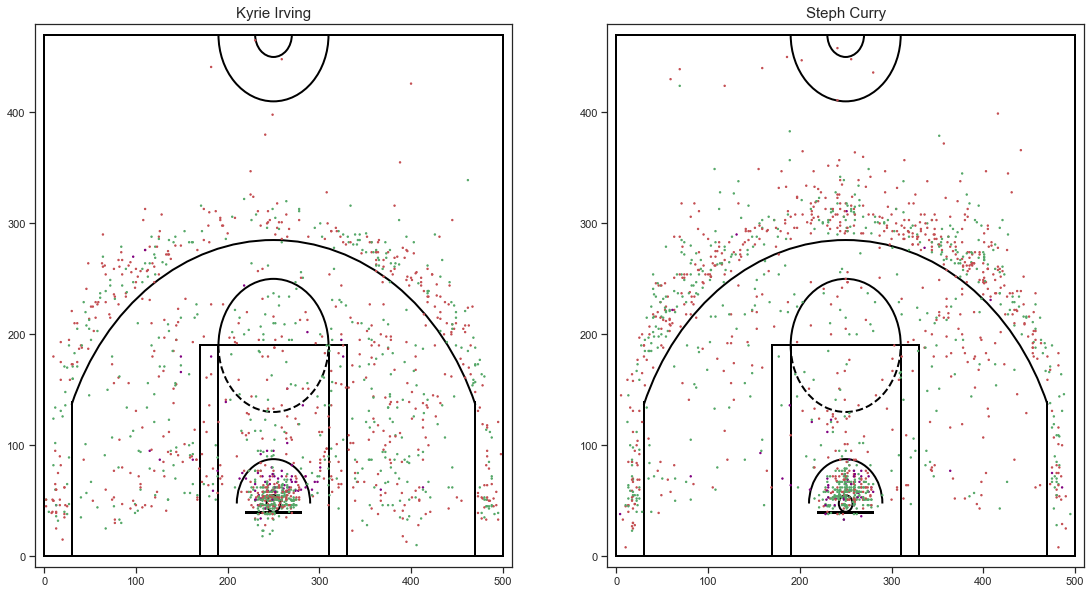

In [49]:
n=5
f = plt.figure(figsize=(94/n,50/n))


ax = f.add_subplot(121)
plt.xlim(-10,510)
plt.ylim(-10,480)
draw_court(outer_lines=True)
colors = np.where(Kyrie['current_shot_outcome']=='SCORED','g',np.where(Kyrie['current_shot_outcome']=='MISSED','r','purple'))
ax = plt.scatter(hxK,hyK, s=8, c= colors, marker= '.')
plt.title("Kyrie Irving", fontsize = 15)

ax = f.add_subplot(122)
plt.xlim(-10,510)
plt.ylim(-10,480)
draw_court(outer_lines=True)
colors = np.where(Curry['current_shot_outcome']=='SCORED','g',np.where(Curry['current_shot_outcome']=='MISSED','r','purple'))
ax = plt.scatter(hxC,hyC, s=8, c= colors, marker= '.')
plt.title("Steph Curry", fontsize = 15)

## Function To plot made shots for any player during the 2016-2017 season

In [50]:
def plot_makes(player):
    n=4
    plt.figure(figsize=(94/(2*n),50/n))
    draw_court(outer_lines=True)

    Player = shot[shot['shoot_player']==player]
    PlayerScored = Player[Player.current_shot_outcome =='SCORED']

    plt.scatter(PlayerScored['halfcourt_x'],PlayerScored['halfcourt_y'], s=12,c='g', marker= '.')
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.title(f"{player} Scored Shots for 16-17 NBA season", fontsize = 15)
    plt.show()

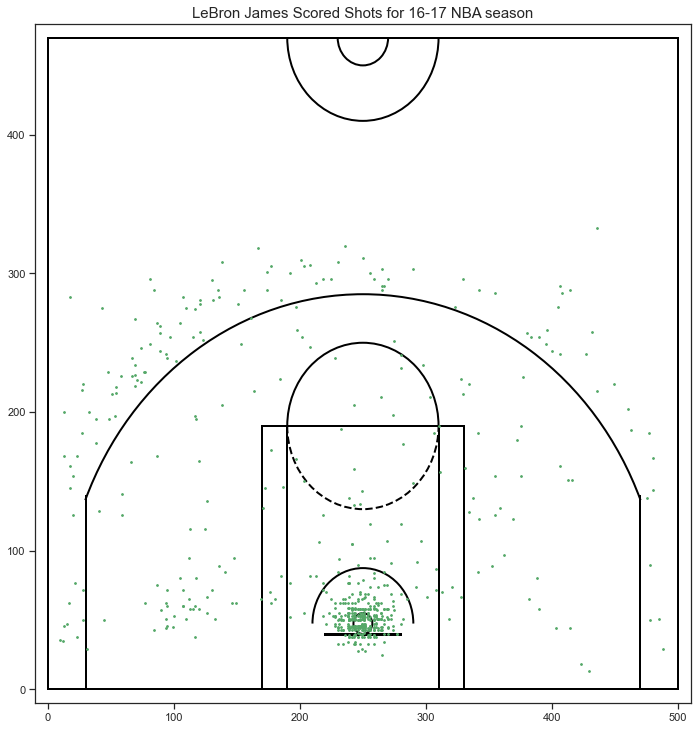

In [51]:
plot_makes("LeBron James")

## Function to plot all shots comparison between any two players

In [52]:
def compare_shots(player1, player2):
    n=5
    f = plt.figure(figsize=(94/n,50/n))
    
    Player1 = shot[shot['shoot_player']==player1]
    hxP1 = Player1['halfcourt_x']
    hyP1 = Player1['halfcourt_y']
    
    ax = f.add_subplot(121)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    draw_court(outer_lines=True)
    colors = np.where(Player1['current_shot_outcome']=='SCORED','g',np.where(Player1['current_shot_outcome']=='MISSED','r','purple'))
    ax = plt.scatter(hxP1,hyP1, s=8, c= colors, marker= '.')
    plt.title(player1, fontsize = 15)
    
    Player2 = shot[shot['shoot_player']==player2]
    hxP2 = Player2['halfcourt_x']
    hyP2 = Player2['halfcourt_y']

    ax = f.add_subplot(122)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    draw_court(outer_lines=True)
    colors = np.where(Player2['current_shot_outcome']=='SCORED','g',np.where(Player2['current_shot_outcome']=='MISSED','r','purple'))
    ax = plt.scatter(hxP2,hyP2, s=8, c= colors, marker= '.')
    plt.title(player2, fontsize = 15)

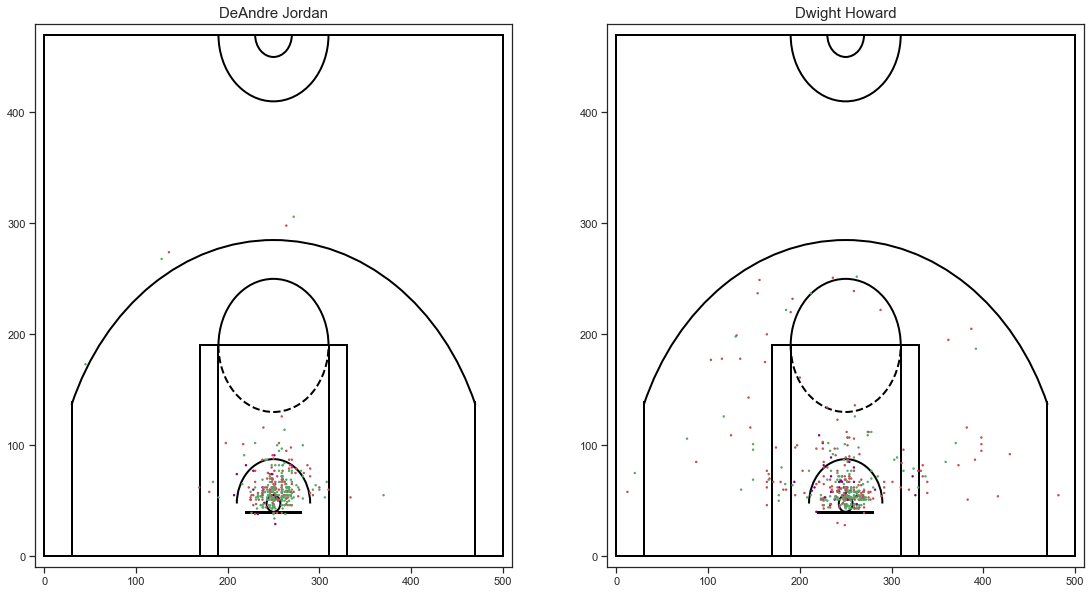

In [53]:
compare_shots("DeAndre Jordan", "Dwight Howard")

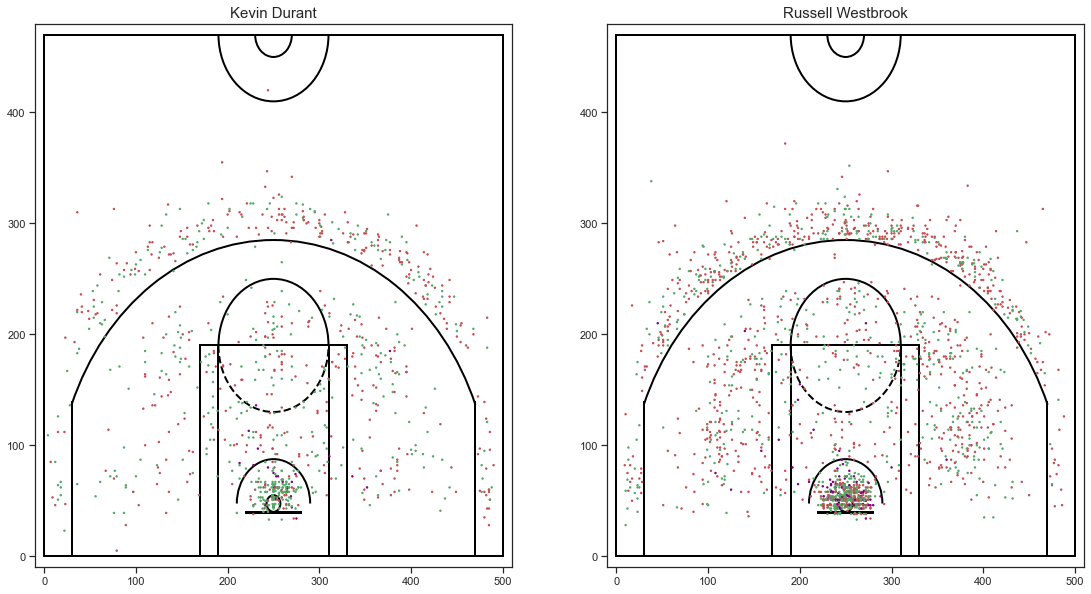

In [54]:
compare_shots("Kevin Durant", "Russell Westbrook")

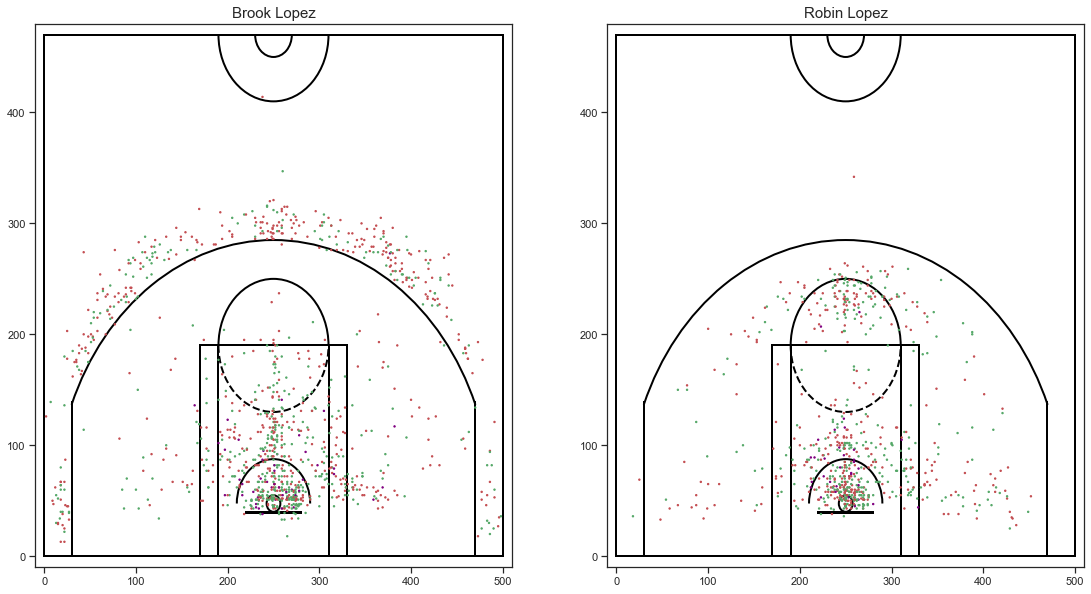

In [55]:
compare_shots("Brook Lopez", "Robin Lopez")

## Create Seaborne joint plots for our data

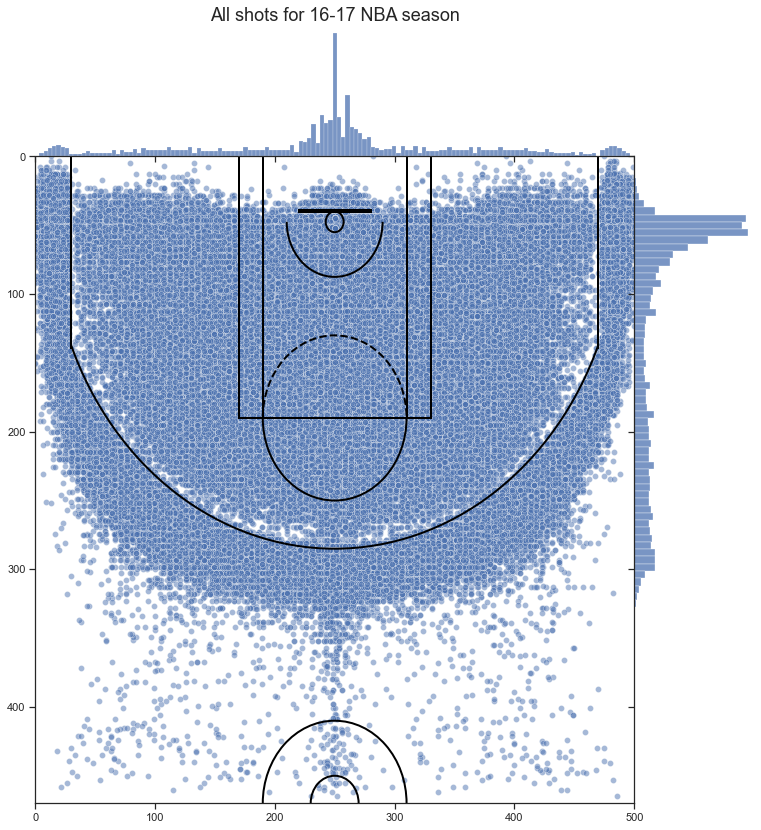

In [56]:
joint_shot_chart = sns.jointplot(x=shot['halfcourt_x'], y=shot['halfcourt_y'],
                                 kind='scatter', space=0, alpha=0.5)


n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('All shots for 16-17 NBA season', y=1.2, fontsize=18)

plt.show()

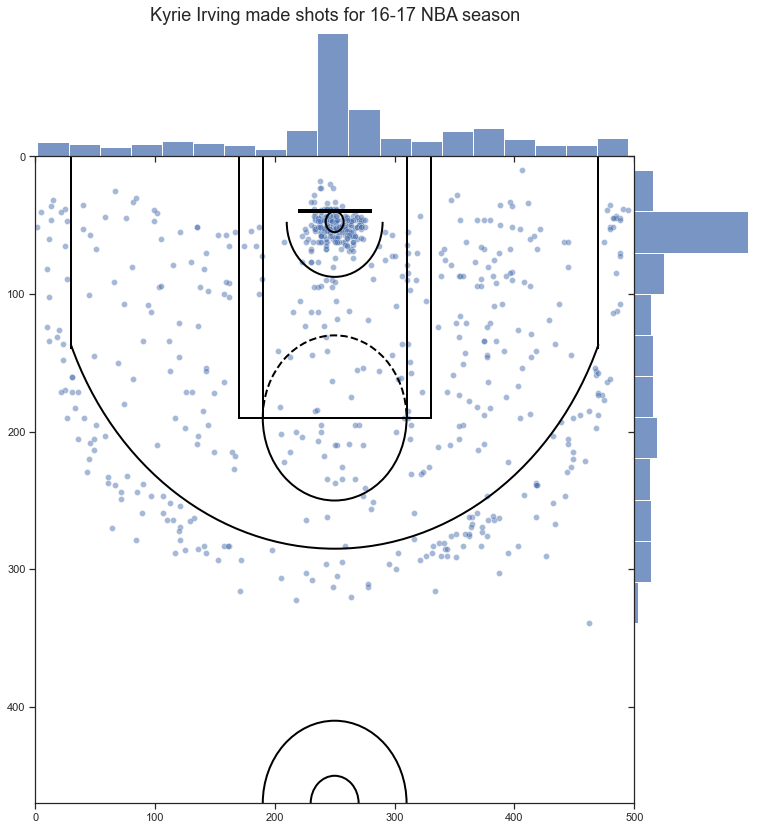

In [57]:
joint_shot_chart = sns.jointplot(x=KyrieScored['halfcourt_x'], y=KyrieScored['halfcourt_y'],
                                 kind='scatter', space=0, alpha=0.5)


n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Kyrie Irving made shots for 16-17 NBA season', y=1.2, fontsize=18)

plt.show()

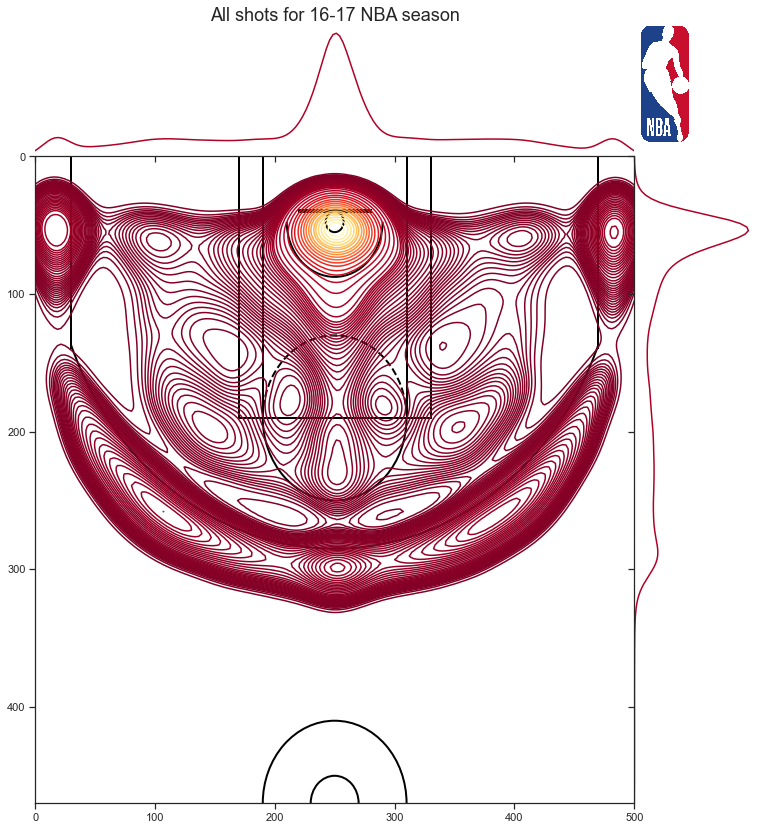

In [58]:
pic = urllib.request.urlretrieve("https://pngimg.com/uploads/nba/nba_PNG20.png")
NBA_logo = plt.imread(pic[0])

cmap=plt.cm.YlOrRd_r 

joint_shot_chart = sns.jointplot(x=shot['halfcourt_x'], y=shot['halfcourt_y'],
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('All shots for 16-17 NBA season', 
             y=1.2, fontsize=18)

img = OffsetImage(NBA_logo, zoom=0.025)
img.set_offset((635,680))
ax.add_artist(img)

plt.show()

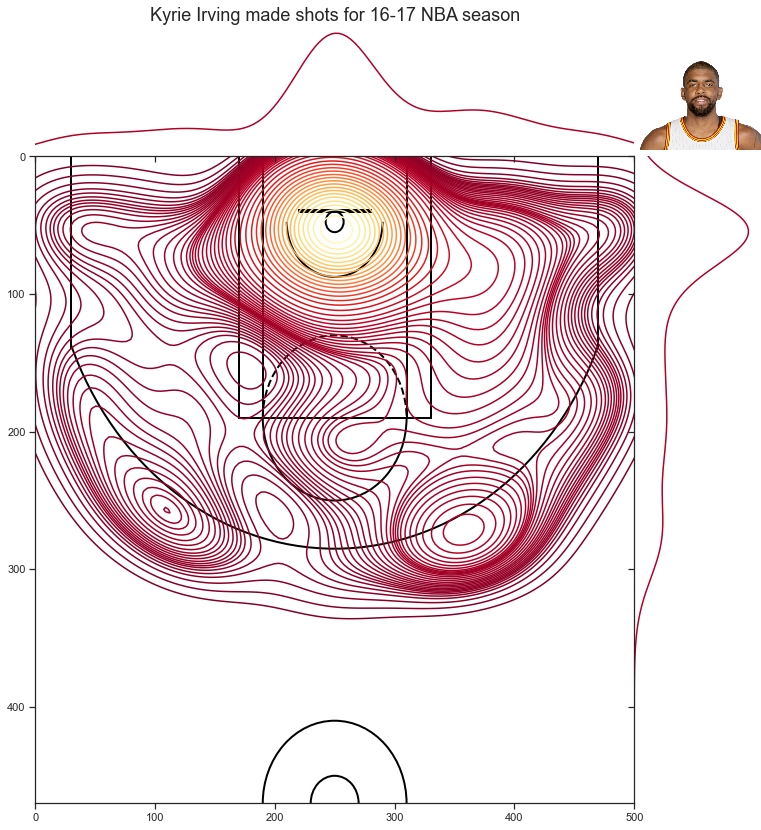

In [59]:
pic = urllib.request.urlretrieve("http://assets.espn.go.com/magazine/test/nbafinals_0526a/irving.png")
KyriePic = plt.imread(pic[0])

cmap=plt.cm.YlOrRd_r 

joint_shot_chart = sns.jointplot(x=KyrieScored['halfcourt_x'], y=KyrieScored['halfcourt_y'],
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Kyrie Irving made shots for 16-17 NBA season', 
             y=1.2, fontsize=18)

img = OffsetImage(KyriePic, zoom=0.22)
img.set_offset((635,680))
ax.add_artist(img)

plt.show()

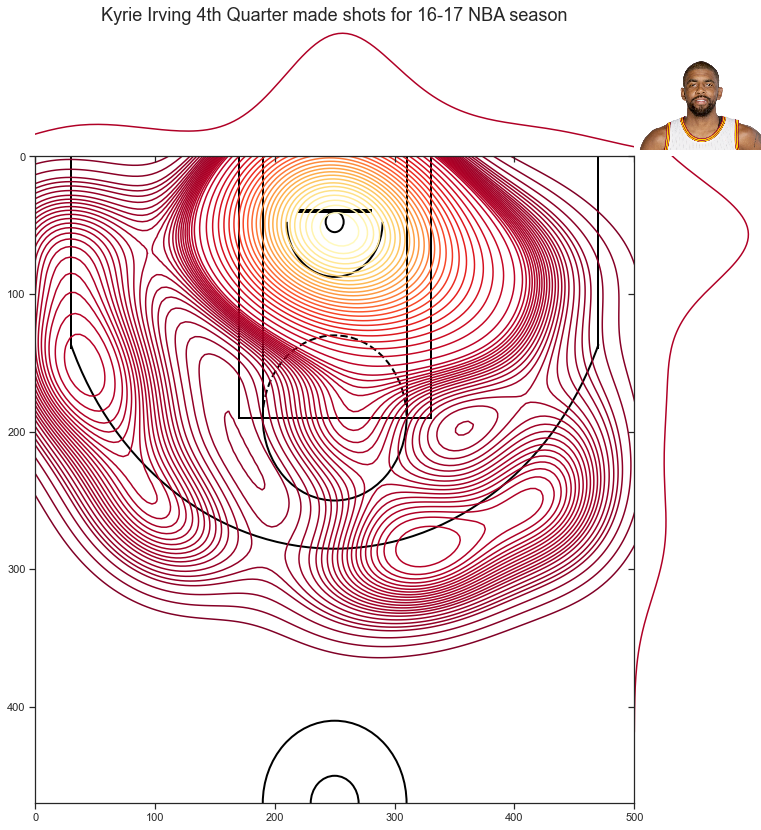

In [64]:
pic = urllib.request.urlretrieve("http://assets.espn.go.com/magazine/test/nbafinals_0526a/irving.png")
KyriePic = plt.imread(pic[0])

cmap=plt.cm.YlOrRd_r 

KyrieScoredQ4 = KyrieScored[KyrieScored['quarter']==4]

joint_shot_chart = sns.jointplot(x=KyrieScoredQ4['halfcourt_x'], y=KyrieScoredQ4['halfcourt_y'],
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Kyrie Irving 4th Quarter made shots for 16-17 NBA season', 
             y=1.2, fontsize=18)

img = OffsetImage(KyriePic, zoom=0.22)
img.set_offset((635,680))
ax.add_artist(img)

plt.show()

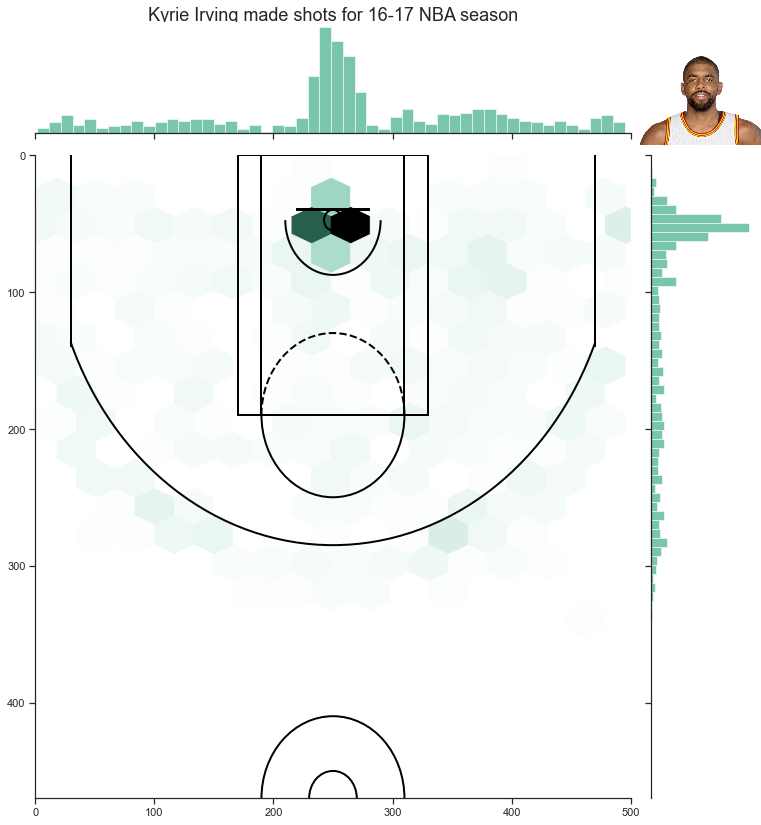

In [60]:
sns.set_theme(style="ticks")

pic = urllib.request.urlretrieve("http://assets.espn.go.com/magazine/test/nbafinals_0526a/irving.png")
KyriePic = plt.imread(pic[0])

cmap=plt.cm.YlOrRd_r 

joint_shot_chart = sns.jointplot(x=KyrieScored['halfcourt_x'], y=KyrieScored['halfcourt_y'],
                                 kind='hex',color="#4CB391", marginal_kws=dict(bins=50, fill=True))

n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Kyrie Irving made shots for 16-17 NBA season', 
             y=1.2, fontsize=18)

img = OffsetImage(KyriePic, zoom=0.22)
img.set_offset((635,680))
ax.add_artist(img)

plt.show()

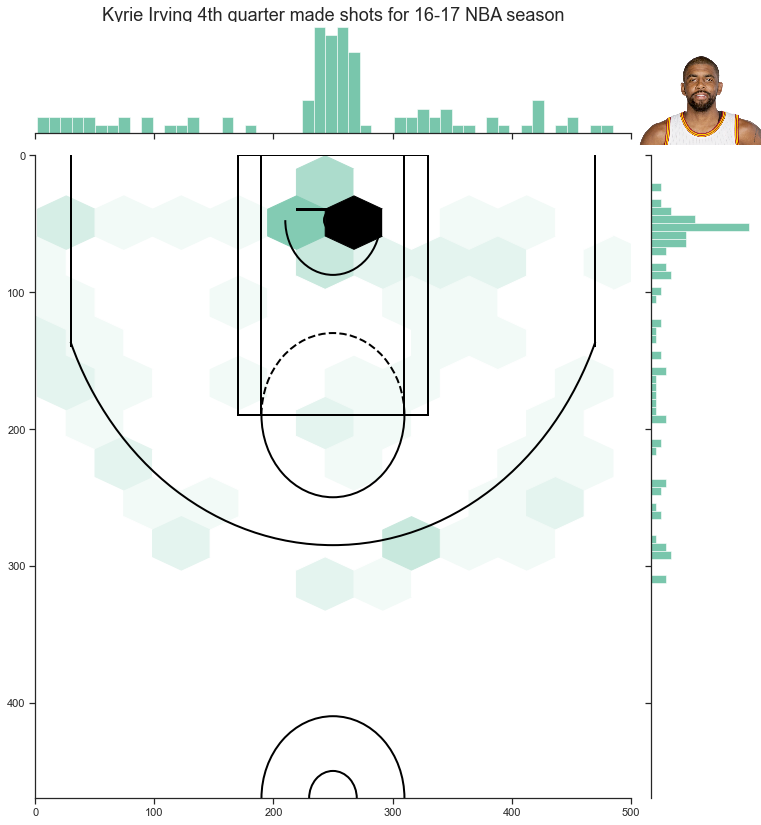

In [66]:
sns.set_theme(style="ticks")

pic = urllib.request.urlretrieve("http://assets.espn.go.com/magazine/test/nbafinals_0526a/irving.png")
KyriePic = plt.imread(pic[0])

cmap=plt.cm.YlOrRd_r 



joint_shot_chart = sns.jointplot(x=KyrieScoredQ4['halfcourt_x'], y=KyrieScoredQ4['halfcourt_y'],
                                 kind='hex',color="#4CB391", marginal_kws=dict(bins=50, fill=True))

n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Kyrie Irving 4th quarter made shots for 16-17 NBA season', 
             y=1.2, fontsize=18)

img = OffsetImage(KyriePic, zoom=0.22)
img.set_offset((635,680))
ax.add_artist(img)

plt.show()

## Function to return summary plots for any player during the 2016-2017 season

In [65]:
### add later